In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv1 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases1')
wv2 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases2')
wv3 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases3')
wv4 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases4')
wv1.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,ex_rate_diff_plus_7,ex_rate_diff_plus_8,ex_rate_diff_minus_1,ex_rate_diff_minus_2,ex_rate_diff_minus_3,ex_rate_diff_minus_4,ex_rate_diff_minus_5,ex_rate_diff_minus_6,ex_rate_diff_minus_7,ex_rate_diff_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,-0.023320,-0.020960,0.01938,0.00484,0.000240,0.050020,-0.042060,-0.008100,-0.005965,-0.012815
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,-0.004520,-0.023320,0.00484,0.00024,0.050020,-0.042060,-0.008100,-0.005965,-0.012815,-0.005420
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,-0.015185,-0.004520,0.00024,0.05002,-0.042060,-0.008100,-0.005965,-0.012815,-0.005420,-0.003240
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.001075,-0.015185,0.05002,-0.04206,-0.008100,-0.005965,-0.012815,-0.005420,-0.003240,0.032500
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,0.035820,-0.001075,-0.04206,-0.00810,-0.005965,-0.012815,-0.005420,-0.003240,0.032500,-0.004350


## remove linear trend

In [3]:
from sklearn.linear_model import LinearRegression

In [12]:
wv_data_file = 'wv_cases1'
df = wv1
df['detrend_demand'] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 
    
    demand_data_points = df.loc[prov_row_idx, 'total_demand'].values
    time_x = np.arange(len(demand_data_points)).reshape(-1, 1)
    reg = LinearRegression().fit(time_x, demand_data_points)
    trend_demand = reg.predict(time_x)
    std_demand = np.std(demand_data_points)
    df.loc[prov_row_idx, 'detrend_demand'] = (demand_data_points - trend_demand)/std_demand
    
print(df.shape)

    # create placeholder
for offset in range(1, 9):
    df['detrend_demand_plus_%s' % offset] = None
# shift IV the other way by up to 2 months    
for offset in range(1, 9):
    df['detrend_demand_minus_%s' % offset] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 

    for offset in range(1, 9):
        df.loc[prov_row_idx, 'detrend_demand_plus_%s' % offset] = df.loc[prov_row_idx, 'detrend_demand'].shift(offset)
    # shift IV the other way by up to 2 months    
    for offset in range(1, 9):
        df.loc[prov_row_idx, 'detrend_demand_minus_%s' % offset] = df.loc[prov_row_idx, 'detrend_demand'].shift(-offset)

print(df.shape)

(6554, 27)
(6554, 43)


In [14]:
wv_data_file = 'wv_cases1'

df.to_csv(
    data_dir + 'regression_data_%s_detrend_20210204.csv' % wv_data_file, 
    index=False)
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,detrend_demand_plus_7,detrend_demand_plus_8,detrend_demand_minus_1,detrend_demand_minus_2,detrend_demand_minus_3,detrend_demand_minus_4,detrend_demand_minus_5,detrend_demand_minus_6,detrend_demand_minus_7,detrend_demand_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,-0.34944,-0.350334,0.634449,-0.352123,-0.353017,-0.353912,1.12371,-0.3557
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,NaN,-0.350334,0.634449,-0.352123,-0.353017,-0.353912,1.12371,-0.3557,-0.356595
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,NaN,0.634449,-0.352123,-0.353017,-0.353912,1.12371,-0.3557,-0.356595,-0.357489
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,NaN,-0.352123,-0.353017,-0.353912,1.12371,-0.3557,-0.356595,-0.357489,-0.358384
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,NaN,-0.353017,-0.353912,1.12371,-0.3557,-0.356595,-0.357489,-0.358384,-0.359278


In [16]:
df.columns

Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'ex_rate', 'fake_date', 'month', 'quarter', 'ex_rate_diff',
       'ex_rate_diff_plus_1', 'ex_rate_diff_plus_2', 'ex_rate_diff_plus_3',
       'ex_rate_diff_plus_4', 'ex_rate_diff_plus_5', 'ex_rate_diff_plus_6',
       'ex_rate_diff_plus_7', 'ex_rate_diff_plus_8', 'ex_rate_diff_minus_1',
       'ex_rate_diff_minus_2', 'ex_rate_diff_minus_3', 'ex_rate_diff_minus_4',
       'ex_rate_diff_minus_5', 'ex_rate_diff_minus_6', 'ex_rate_diff_minus_7',
       'ex_rate_diff_minus_8', 'detrend_demand', 'detrend_demand_plus_1',
       'detrend_demand_plus_2', 'detrend_demand_plus_3',
       'detrend_demand_plus_4', 'detrend_demand_plus_5',
       'detrend_demand_plus_6', 'detrend_demand_plus_7',
       'detrend_demand_plus_8', 'detrend_demand_minus_1',
       'detrend_demand_minus_2', 'detrend_demand_minus_3',
       'detrend_demand_minus_4', 'detrend_demand_minus_5',
       'detrend_demand_minus_6', 'detrend_demand_mi

In [19]:
len(df.province), len(df.detrend_demand)

(6554, 6554)

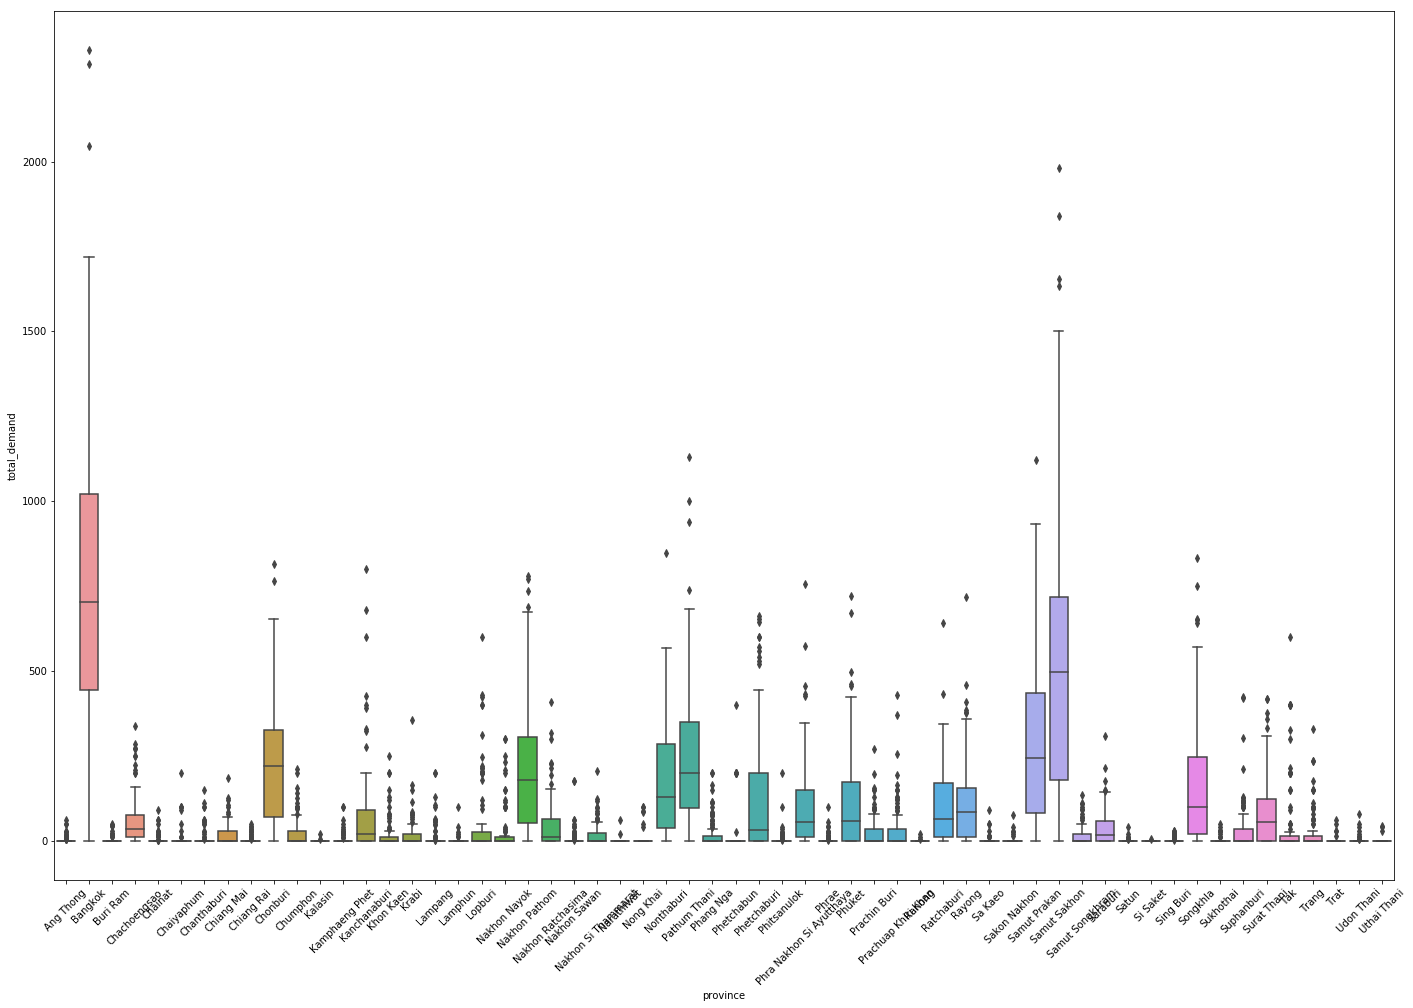

In [23]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['total_demand'] = df['total_demand'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='total_demand')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()

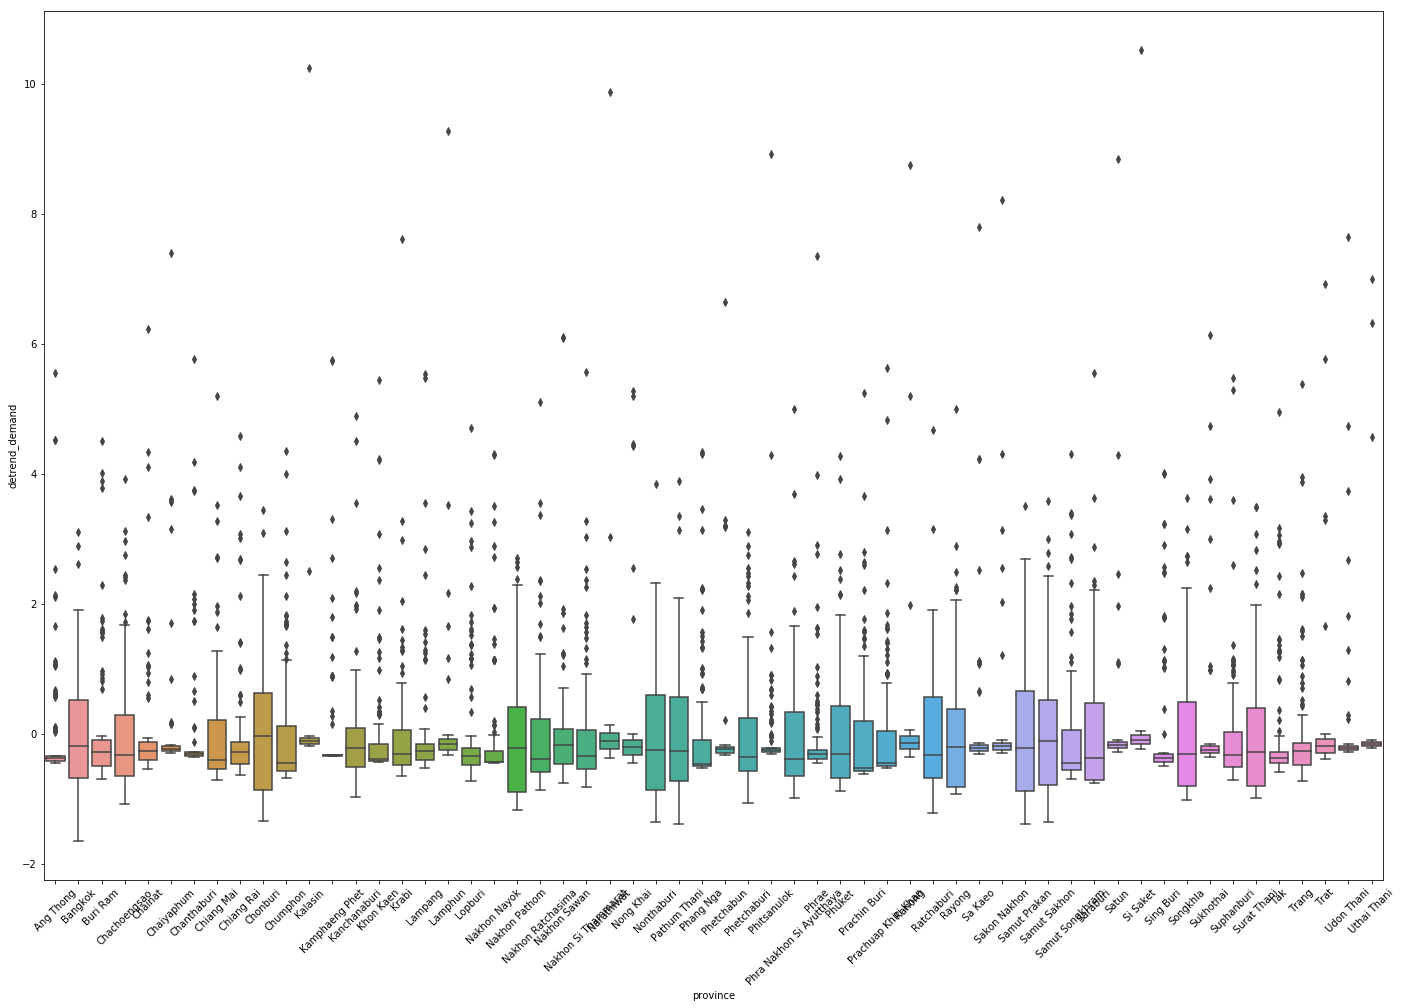

In [22]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['detrend_demand'] = df['detrend_demand'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='detrend_demand')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()